In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.linalg as sla
    
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

### Linear Regression
If there's a linear correlation between features and targert 
$$
y = w_1x_1 + w_2x_2 + ... + w_kx_k + b
$$
where  y - target, x - feature , w - weight of i feature, b - bias 

##### Loss 
$$
L(y_{pred}, Y) = \frac{1}{n}||y_{pred}-Y||^2_{2} = \frac{1}{n}||Xw - Y||^2_2 = \frac{1}{n}\sum_{i=1}^{n}\left(\sum_{j=1}^{m} x_{ij}w_j - y_i\right)^2 =: L(w)
$$

##### Method of the minimum loss gives such solution:
$$
    w = (X^TX)^{-1}X^TY
$$

In [2]:
class LinearRegression__:
    def __init__ (self, fit_intercept = True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        n, k = X.shape

        X_train = X

        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        
        return self
    
    def predict(self, X):
        n, K = X.shape

        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred

    def get_weights(self):
        return self.w

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
def linear_expression(x):
    return 5 * x + 6

In [5]:
objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)

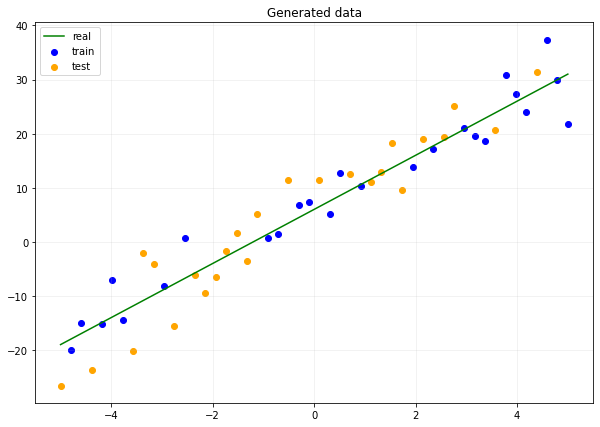

In [6]:
plt.figure(figsize = (10, 7))
plt.plot(X, linear_expression(X), label = 'real', c ='g')
plt.scatter(X_train, y_train, label = 'train', c = 'b')
plt.scatter(X_test, y_test, label = 'test', c = 'orange')

plt.title("Generated data")
plt.grid(alpha = 0.2)
plt.legend()

In [7]:
#teaching the model 
regressor = LinearRegression__()
regressor.fit(X_train[:, np.newaxis], y_train)
prediction = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()
w

array([4.7579459 , 6.59432667])

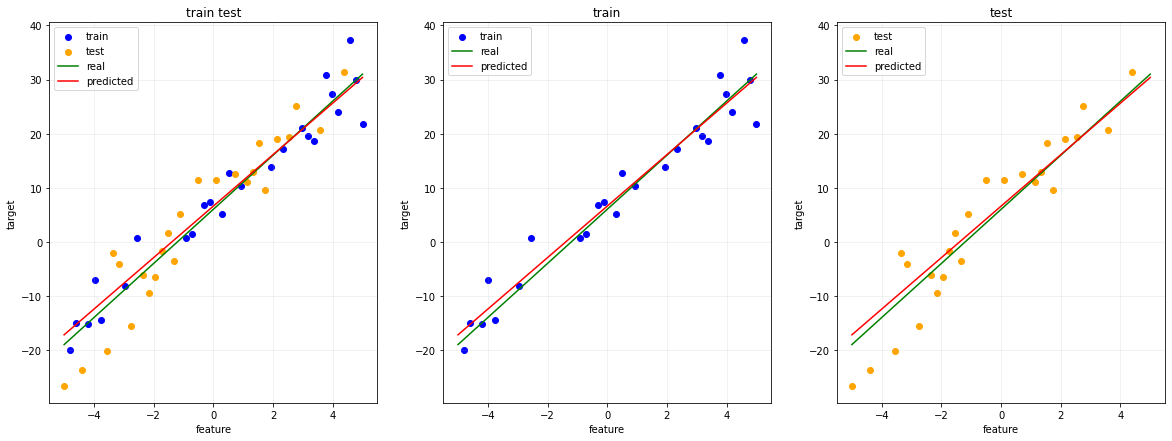

In [8]:
plt.figure(figsize = (20, 7))

ax = None
for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey = ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label = 'train', c = 'b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label = 'test', c = 'orange')
    
    plt.plot(X, linear_expression(X), label = 'real', c = 'g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label = 'predicted', c = 'r')

    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(" ".join(types))
    plt.grid(alpha = 0.2)
    plt.legend()
plt.show()

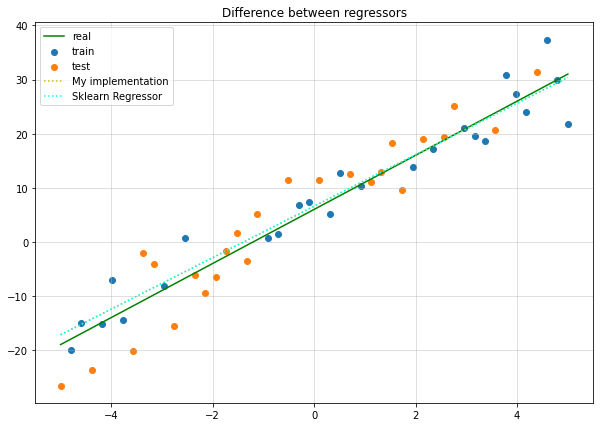

In [9]:
sk_reg = LinearRegression().fit(X_train[:, np.newaxis], y_train)

plt.figure(figsize = (10, 7))
plt.plot(X, linear_expression(X), label = 'real', c = 'g')

plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')

plt.plot(X, regressor.predict(X[:, np.newaxis]), label = 'My implementation', c = 'y', linestyle = ':')
plt.plot(X, sk_reg.predict(X[:, np.newaxis]), label = 'Sklearn Regressor', c = 'cyan', linestyle = ':')
plt.grid(alpha = 0.5)
plt.title('Difference between regressors')
plt.legend()

plt.show()


### Results


In [10]:
from sklearn.metrics import mean_squared_error

train_prediction = regressor.predict(X_train[:, np.newaxis])
test_prediction = regressor.predict(X_test[:, np.newaxis])

print('Train MSE: ', mean_squared_error(y_train, train_prediction))
print('Test MSE: ', mean_squared_error(y_test, test_prediction))

Train MSE:  14.261028251289144
Test MSE:  27.907797020093252


### Stochastic Gradient Descent: 
1. Compitation of  $\displaystyle\frac{\partial{L}}{\partial{w}}$ -- gradient of loss  $L(y_{pred}, y_{true})$) in dependence of $w$ (weights)
2. Changing the $w$ with learning rate:
$$w = w - h\frac{\partial{L}}{\partial{w}}$$
3. Repeat 1 & 2 till loss wont be changing 

##### Math implementation 
$$
L(y_{pred}, Y) = \frac{1}{n}||y_{pred} - Y||^2 = \frac{1}{n}||Xw - Y||^2 = \frac{1}{n}(Xw - Y)^T(Xw-Y) = \frac{1}{n}(w^TX^TXw - X^Tw^TY - Y^TXw + Y^TY)
$$
$$
\frac{\partial L}{\partial w} = \frac {2}{n}(X^TXw - Y^TX) = \frac {2}{n}(X^TXw - X^TY) = \frac {2}{n}X^T(Xw - Y)
$$

In [11]:
def mean_squared_error__(prediction, observation):
    result = prediction - observation
    result = result ** 2
    res = result.sum()/prediction.size
    return res

In [12]:
class LinearRegressionGSD(LinearRegression__):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = None
    
    def fit(self, X, y, lr=0.01, max_iter=100):
        n, k = X.shape

        if (self.w == None):
            if self.fit_intercept:
                self.w = np.random.randn(k + 1)
            else: 
                self.w = np.random.randn(k)

        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
        else:
            X_train = X
        
        self.losses = []
        
        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, y))

            grad = self.calculate_gradient(X_train, y, y_pred)

            assert grad.shape == self.w.shape, f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"
            self.w -= lr * grad

        return self

    def calculate_gradient(self, X, y, y_pred):
        grad = 2 * (y_pred - y)[:, np.newaxis] * X
        grad = grad.mean(axis=0)
        return grad

    def get_losses(self):
        return self.losses

In [13]:
regressor = LinearRegressionGSD(fit_intercept=True)

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

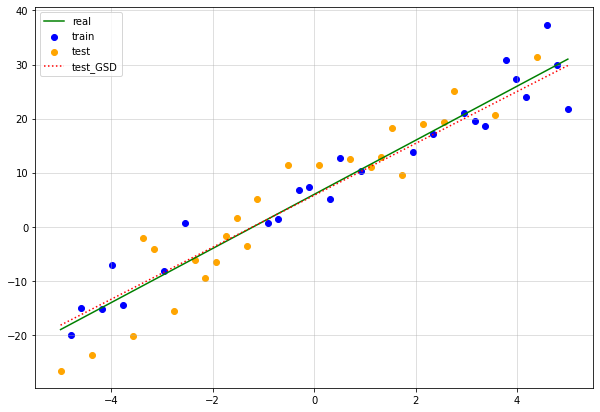

In [14]:
plt.figure(figsize = (10, 7))
plt.plot(X, linear_expression(X), label = 'real', c = 'g')
plt.scatter(X_train, y_train, label = "train", c = 'b')
plt.scatter(X_test, y_test, label = 'test', c = 'orange')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label = 'test_GSD', c = 'red', linestyle = ':')
plt.legend()
plt.grid(alpha = 0.5)
plt.show()

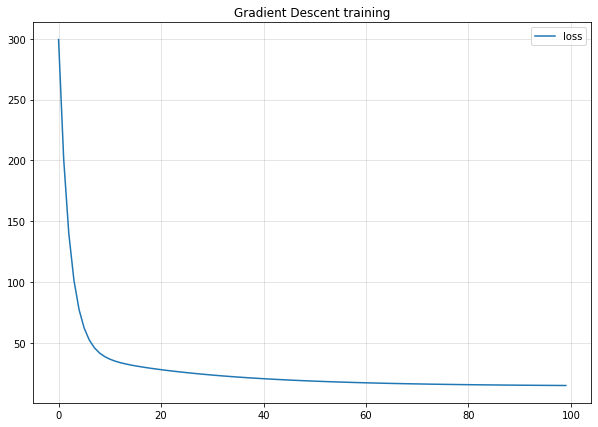

In [15]:
plt.figure(figsize = (10, 7))
plt.plot(regressor.get_losses(), label = 'loss')
plt.title('Gradient Descent training')
plt.grid(alpha = 0.4)
plt.legend()
plt.show()


### Adding Batch 

In [47]:
class LinearRegressionGSDwithBatch(LinearRegressionGSD):
    def __init__ (self, n_samples = 10, **kwargs):
        super().__init__(**kwargs)
        self.w = None
        self.n_samples = n_samples
        
    def calculate_gradient(self, X, y, y_pred): 
        inds = np.random.choice(np.arange((X.shape[0])), size = self.n_samples, replace = False)
        
        grad = 2 * (y_pred[inds] - y[inds])[:, np.newaxis] * X[inds]
        grad = grad.mean(axis = 0)
        return grad 

In [17]:
regressor = LinearRegressionGSDwithBatch(fit_intercept = True)

l = regressor.fit(X_train[:, np.newaxis], y_train)

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

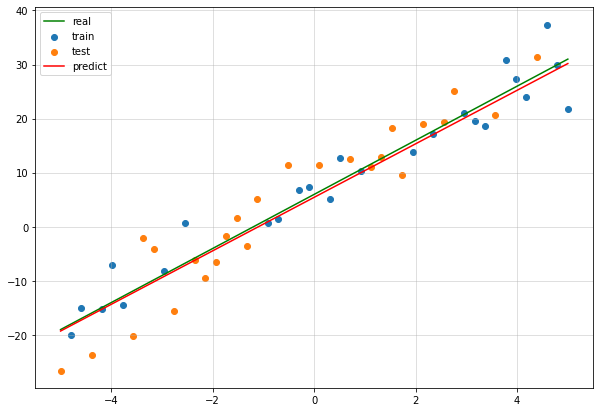

In [18]:
plt.figure(figsize = (10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label = 'predict', c = 'red')

plt.grid(alpha = 0.5)
plt.legend()
plt.show()

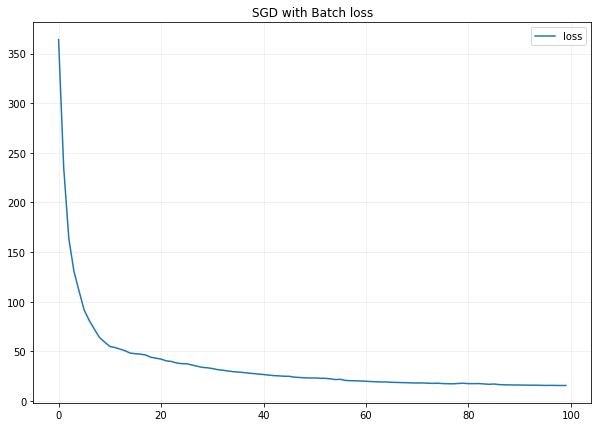

In [19]:
plt.figure(figsize = (10, 7))
plt.plot(regressor.get_losses(), label = 'loss')
plt.title('SGD with Batch loss')
plt.legend()
plt.grid(alpha = 0.2)
plt.show()

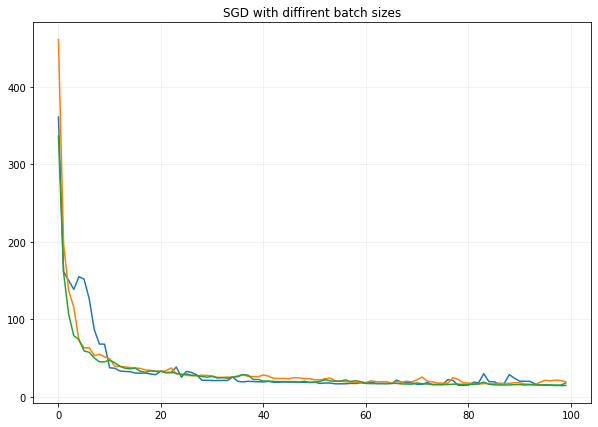

In [20]:
batch_lens = [1, 2, 4]
plt.figure(figsize = (10, 7))
plt.title("SGD with diffirent batch sizes")

for i in batch_lens:
    r = LinearRegressionGSDwithBatch(n_samples = i)
    r.fit(X_train[:, np.newaxis], y_train)
    plt.plot(r.get_losses())

plt.grid(alpha = 0.2)
plt.show()

### Regularization
1. LASSO (least absolute shrinkage and selection operator) - penalty based on ||𝑤||
2. Ridge - penalty based on $||w||_{2}^2$

In [21]:
number_of_objects = 50
data_set = np.linspace(-5, 5, number_of_objects)
y = linear_expression(data_set) + np.random.rand(number_of_objects) * 5 

X_train, X_test, y_train, y_test = train_test_split(data_set, y, train_size = 0.5)

### Ridge 
Add penalty with rate $\lambda$ to loss function:

$ L(w) = ||Xw - Y||_2^2 + \lambda ||w||_2^2   $,  $\lambda $   is hyperparameter 

$ L(w) = \sum_{i=1}^n\left(\sum_{j=1}^{m} x_{ij}w_j - y_i\right)^2 + \lambda\sum_{j=1}^{m}w_j^2 $
To fix the problem with different sizes of weights necessary to standardize values, for example with `sklearn.preprocessing.StandardScaler`

In [22]:
reg = Ridge(alpha = 1).fit(np.hstack((data_set, data_set, data_set))[:, np.newaxis], np.hstack((y, y, y)))
np.append(reg.coef_, reg.intercept_)

array([5.01928918, 8.66365375])

In [23]:
reg = Ridge(alpha = 1/3).fit(X[:, np.newaxis], y)
np.append(reg.coef_, reg.intercept_)

array([5.01928918, 8.66365375])

Weights are the same due to the lack of standardization  in Loss function (!)

### Analytical solution for Ridge Regression 

$$ L(w) = ||Xw - Y||^2_2 + ||\Gamma w||^2_2 $$

min with:

$$ w = (X^TX + \Gamma^T \Gamma)^{-1}X^TY $$
if there's no b:
$\space \Gamma^T\Gamma = \lambda I$ else:
$\Gamma^T\Gamma =
\left(\begin{matrix}
\lambda I & 0 \\
0 & 0
\end{matrix}\right)$


In [24]:
class RidgeRegression__ (LinearRegression__):
    def __init__(self, alpha = 0.3, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
    def fit(self, X, y):
        n, k = X.shape

        X_train = X

        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
        
        lambdaI = self.alpha * np.eye(X_train.shape[1])
        if self.fit_intercept:
            lambdaI[-1, -1] = 0

        self.w = np.linalg.inv(X_train.T @ X_train + lambdaI) @ X_train.T @ y

        return self
    def get_weights(self):
        return self.w 

In [25]:
alpha = 1
regressor = RidgeRegression__(alpha = alpha).fit(X_train[:, np.newaxis], y_train)
#sk_reg = Ridge(alpha).fit(X_train[:, np.newaxis], y_train)
#regressor.predict(X[:, np.newaxis])

In [26]:
sklearn_reg = Ridge(alpha).fit(X_train[:, np.newaxis], y_train)
assert np.allclose(regressor.get_weights(), np.append(sklearn_reg.coef_, sklearn_reg.intercept_))
regressor.get_weights()

array([4.96648178, 8.50901873])

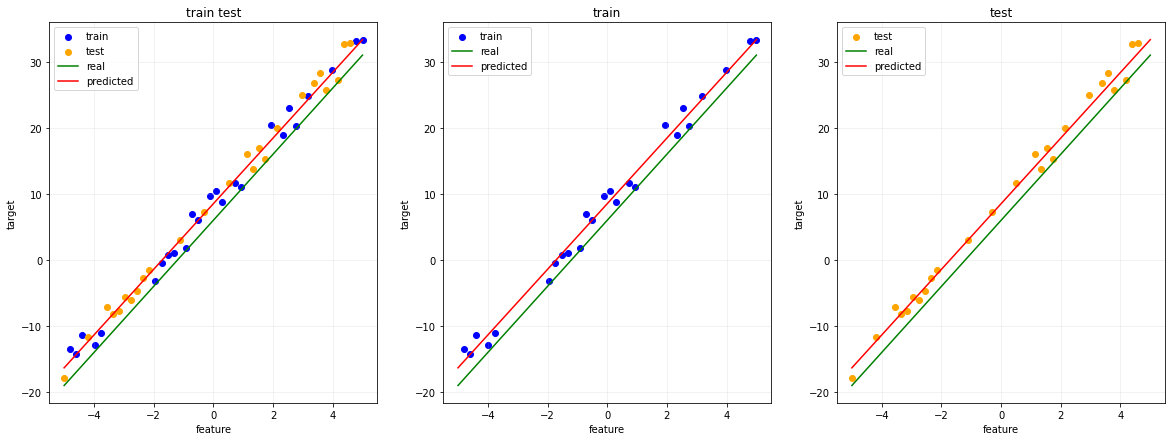

In [46]:
plt.figure(figsize = (20, 7))

ax = None
for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train', c='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test', c='orange')

    plt.plot(X, linear_expression(X), label='real', c='g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(" ".join(types))
    plt.grid(alpha=0.2)
    plt.legend()

plt.show()

### SGD with RidgeRegression 
**L(w):**
$$
\begin{aligned}L(w) &= ||Xw - Y||^2_2 + ||\Gamma w||^2_2
= (Xw - Y)^T(Xw - Y) + w^T\Gamma^T\Gamma w = \\
&= w^TX^TXw - 2Y^TXw + Y^TY + w^T\Gamma^T\Gamma w =
w^T(X^TX + \Gamma^T\Gamma)w - 2Y^TXw + Y^TY
\end{aligned}
$$

**Gradient:**
$$
\frac{\partial{L}}{\partial{w}}
= 2(X^TX + \Gamma^T\Gamma)w - 2X^TY
$$

Also we will find mean of losses in batch ($\displaystyle\frac{1}{n_{sample}}$)

In [60]:
class SGDRidge(LinearRegressionGSDwithBatch):
    def __init__(self, alpha = 0.3, **kwargs):
        super().__init__(**kwargs)
        self.w = None
        self.alpha = alpha
        
    def calculate_gradient(self, X, y, y_pred):
        inds = np.random.choice(np.arange((X.shape[0])), size = self.n_samples, replace = False)
        
        lambdaI = self.alpha * np.eye(self.w.shape[0])
        if self.fit_intercept:
            lambdaI[-1, -1] = 0
        
        grad = 2 * (X[inds].T @ X[inds] / self.n_samples + lambdaI) @ self.w #divide to n_samples in order to standardize values 
        grad -= 2 * X[inds].T @ y[inds] / self.n_samples

        return grad

In [61]:
alpha = 1.0
regressor = SGDRidge(alpha = alpha).fit(X_train[:, np.newaxis], y_train)

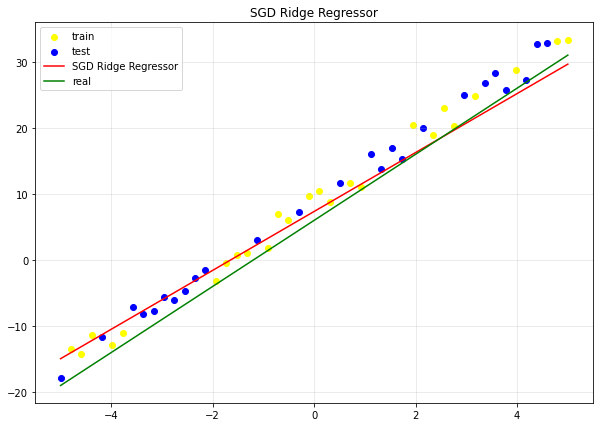

In [62]:
plt.figure(figsize  = (10,7))
plt.scatter(X_train, y_train, c = 'yellow', label = 'train')
plt.scatter(X_test, y_test, c = 'blue', label = 'test')
plt.plot(data_set, regressor.predict(data_set[:, np.newaxis]), c = 'red', label = 'SGD Ridge Regressor')
plt.plot(data_set, linear_expression(data_set), label = 'real', c = 'green')
plt.grid(alpha = 0.3)
plt.title("SGD Ridge Regressor")
plt.legend()
plt.show()

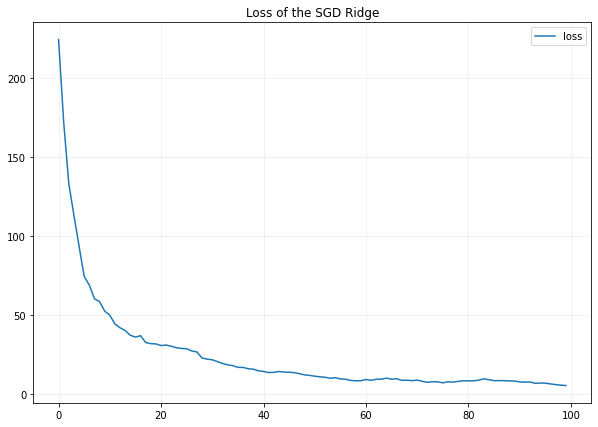

In [64]:
plt.figure(figsize = (10, 7))
plt.title("Loss of the SGD Ridge")
plt.plot(regressor.get_losses(), label = 'loss')
plt.legend()
plt.grid(alpha = 0.2)
plt.show()

### Lasso Regularization 
Loss: 
$$
\begin{aligned}L(w) &= \frac{1}{2n}||Xw - Y||^2_2 + ||\Gamma w||_1
= \frac{1}{2n}(Xw - Y)^T(Xw - Y) + ||\Gamma w||_1 = \\
&= \frac{1}{2n}(w^TX^TXw - 2Y^TXw + Y^TY) + \lambda\sum_{i=1}^{m-1}|w|
\end{aligned}
$$
Gradient:
$$
\frac{\partial{L}}{\partial{w}}
= \frac{1}{n}(X^TXw - X^TY) + \lambda sign(w)
= \frac{1}{n}X^T(y_{pred} - Y) + \lambda sign(w)
$$
where we asume, that
$\frac{\partial |x|}{\partial x} = sign(x)$

In [70]:
def soft_sign(x, eps = 1e-7):
    if abs(x) > eps:
        return np.sign(x)
    return x / eps

np_soft_sign = np.vectorize(soft_sign)

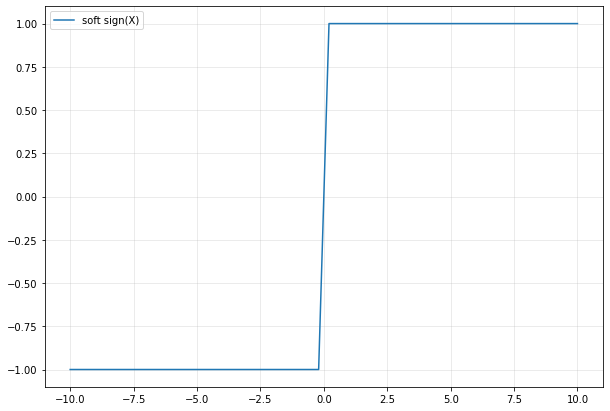

In [71]:
data__ = np.linspace(-10, 10)
plt.figure(figsize = (10, 7))
plt.plot(data__, np_soft_sign(data__), label = 'soft sign(X)')
plt.grid(alpha = 0.3)
plt.legend()
plt.show()

In [72]:
class SGDLasso(LinearRegressionGSDwithBatch):
    def __init__(self, alpha = 1, **kwargs):
        super().__init__(**kwargs)
        self.w = None
        self.alpha = alpha
    
    def calculate_gradient(self, X, y, y_pred):
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_samples, replace=False)
        signw = np_soft_sign(self.w)

        if self.fit_intercept:
            signw[-1] = 0
        
        grad = X[inds].T @ (y_pred[inds] - y[inds])[:, np.newaxis] / self.n_samples
        grad += self.alpha * signw[:, np.newaxis]

        return grad.flatten()

In [76]:
regressor = SGDLasso(alpha = 1, n_samples = 4).fit(X_train[:, np.newaxis], y_train, max_iter = 1000)
losses = regressor.get_losses()
weights = regressor.get_weights()

In [75]:
sklearn_lasso = Lasso().fit(X_train[:, np.newaxis], y_train)

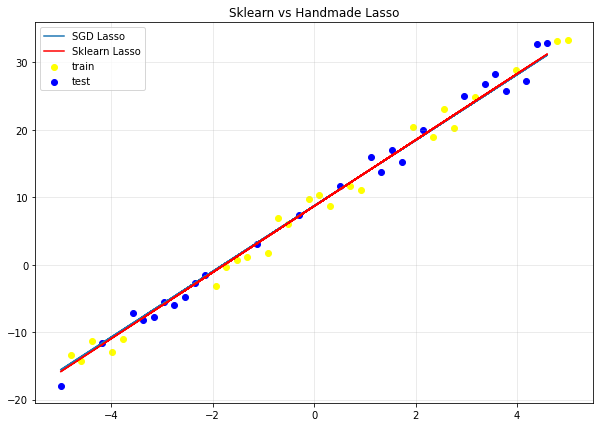

In [80]:
plt.figure(figsize = (10, 7))
plt.plot(X_test, regressor.predict(X_test[:, np.newaxis]), label = "SGD Lasso")
plt.plot(X_test, sklearn_lasso.predict(X_test[:, np.newaxis]), label = "Sklearn Lasso", c = 'red')
plt.scatter(X_train, y_train, c = 'yellow', label = 'train')
plt.scatter(X_test, y_test, c = 'blue', label = 'test')
plt.legend()
plt.grid(alpha = 0.3)
plt.title("Sklearn vs Handmade Lasso")
plt.show()

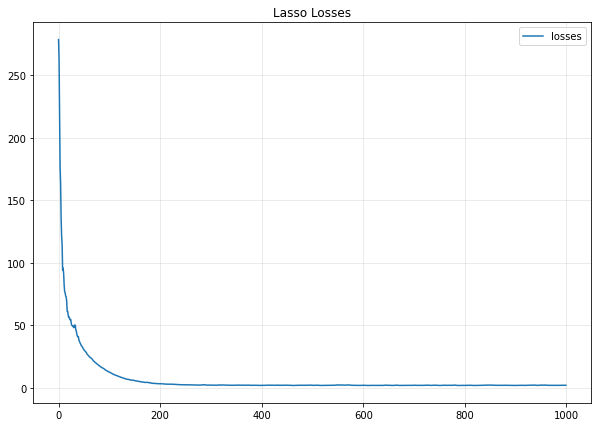

In [81]:
plt.figure(figsize = (10, 7))
plt.plot(losses, label = 'losses')
plt.legend()
plt.grid(alpha = 0.3)
plt.title("Lasso Losses")
plt.show()